
# Title Here
Author: **YOUR NAME HERE**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [1]:
%load_ext autoreload
%autoreload 2


## Crashes by year over time

In [2]:
import dateparser as dp
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.read_csv("all_data.csv")["Date:"]

crashes_by_year = {}

for date in dates:
    # if crashes_by_year

    # use date parser on date:
    year = dp.parse(date).year

    if year in crashes_by_year:
        crashes_by_year[year] += 1
    else:
        crashes_by_year[year] = 1

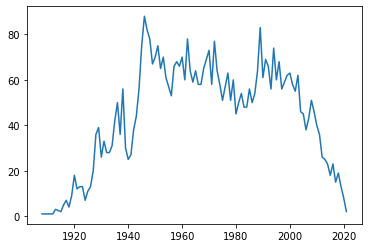

In [7]:
plt.plot(crashes_by_year.keys(), crashes_by_year.values())
plt.show()

In [4]:
crashes_by_month = {}

for date in dates:
    # use date parser on date:
    month = dp.parse(date).month

    # build dictionary
    if month in crashes_by_month:
        crashes_by_month[month] += 1
    else:
        crashes_by_month[month] = 1

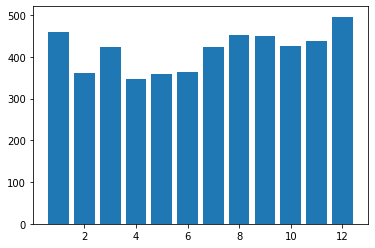

In [5]:
plt.bar(crashes_by_month.keys(), crashes_by_month.values())
plt.show()